In [124]:
from qiskit.visualization import plot_histogram, plot_gate_map, plot_coupling_map, plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit.providers
import matplotlib as plt

In [12]:
qr1 = QuantumRegister(1, name="System Qubit")
qr2 = QuantumRegister(1, name="Wigner's Friend")
cr1 = ClassicalRegister(1, name="Wigner's Friend's Outcome")

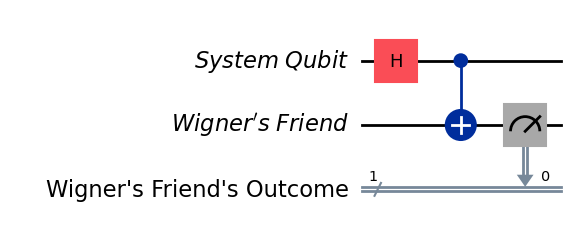

In [28]:
qc = QuantumCircuit(qr1, qr2, cr1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw("mpl")

In [ ]:
''' 
    Here we define the entangled state of Wigner's friend from Wigner's friend's perspective
    The qubit has a defined collapsed state to Wigner's friend
'''

In [19]:
plus = Statevector.from_label("+")
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
plus.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
'''
    This is the result of acting the Hadamard on the input state vector |0>
'''

In [149]:
CX = Operator(
    [
        [1,0,0,0],
        [0,1,0,0],
        [0,0,0,1],
        [0,0,1,0]
    ]
)
I = Operator(
    [
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ]
)
zeros = Operator(
    [
        [1,0],
        [0,0]

    ]
)
ones = Operator(
    [
        [0,0],
        [0,1]
    ]
)

sample = plus.tensor(zero).evolve(CX)
sample.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
'''
    This is the result of acting the cNOT gate on Wigner's Friend's qubit. This would be the result that Wigner's friend measures
    the qubit to be in.
'''

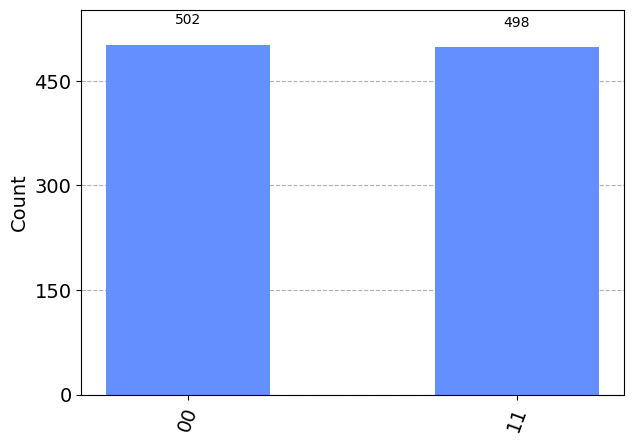

In [107]:
result = sample.sample_counts(1000)
plot_histogram(result)

In [ ]:
'''
    Note that here the results say either 00 or 11, but they should collapse to 0 and 1 for the measured state.
'''

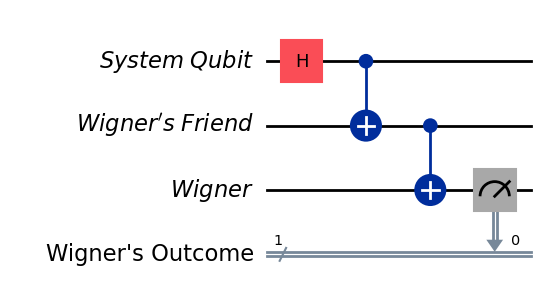

In [112]:
qr3 = QuantumRegister(1, name="Wigner")
cr2 = ClassicalRegister(1, name="Wigner's Outcome")

qc2 = QuantumCircuit(qr1, qr2, qr3, cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure(2,0)

qc2.draw("mpl")

In [150]:
CCX = ( zeros.tensor(I)) + ( ones.tensor(CX) )
CCX.draw("latex")

<IPython.core.display.Latex object>

$$
\text{\small{This is a generalised version of the unitary operation definition:}}
$$
$$
\newcommand{\unit}{1\!\!1}
\ket{0}\bra{0} \otimes \unit + \ket{1}\bra{1} \otimes \text{cNOT}
$$

In [155]:
sampleW = sample.tensor(zero).evolve(CCX)
sampleW.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
'''
    This is the resulting form from Wigner's perspective, which assumes that the state collapses once he has
    received the result from his friend.
'''

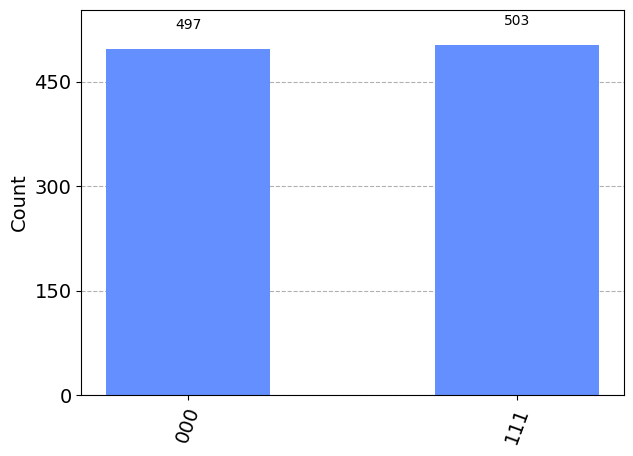

In [158]:
resultW = sampleW.sample_counts(1000)
plot_histogram(resultW)

In [ ]:
'''
    Note that here the results say either 000 or 111, but they should collapse to 0 and 1 for the measured state.
'''

However, this result is solely from the perspective of Wigner, what about Wigner's friend's perspective?

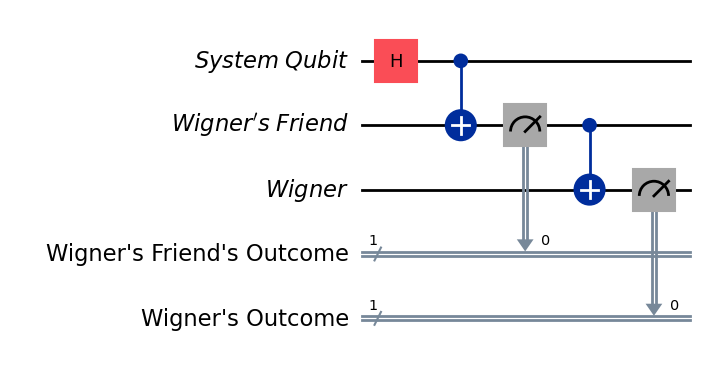

In [162]:
qc3 = QuantumCircuit(qr1, qr2, qr3, cr1, cr2)

qc3.h(0)
qc3.cx(0,1)
qc3.measure(qr2,cr1)
qc3.cx(1,2)
qc3.measure(qr3,cr2)

qc3.draw("mpl")

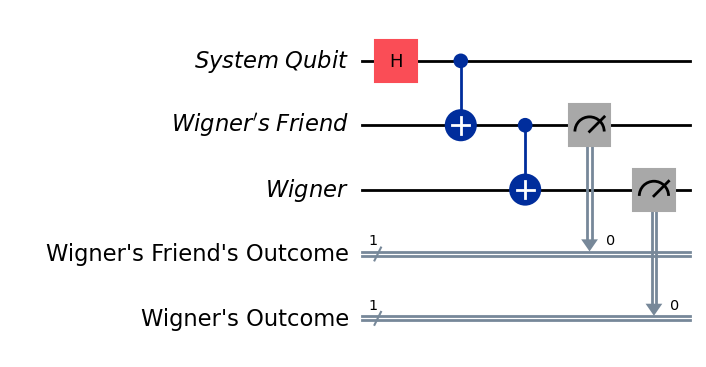

In [165]:
qc4 = QuantumCircuit(qr1, qr2, qr3, cr1, cr2)

qc4.h(0)
qc4.cx(0,1)
qc4.cx(1,2)
qc4.measure(qr2,cr1)
qc4.measure(qr3, cr2)

qc4.draw("mpl")

Comparing these two circuit, the state of collapse is vastly different from each other

If we treat these two as fully quantum systems with no irreversible measurements, then the paradox is lifted

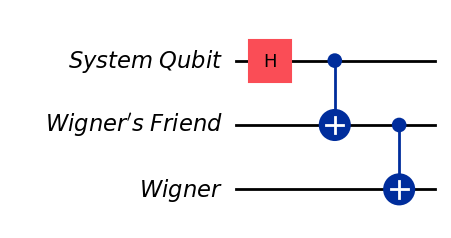

In [167]:
qc5 = QuantumCircuit(qr1, qr2, qr3)

qc5.h(0)
qc5.cx(0,1)
qc5.cx(1,2)

qc5.draw("mpl")

This is not easily measurable with quantum computers, however, it may be done according to the person writing the github repository I'm following?